# 1.Problem Statements

Task 1:-Prepare a complete data analysis report on the given data.

Task 2:- Create a model predicting potential Heart Diseases in people using Machine Learning                    algorithms.

Task3:-Suggestions to the Hospital  to awake the predictions of heart diseases  prevent life threats.


# 2.Import Basic Libraries

In [103]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import sweetviz as sv 
import pickle 

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from pandas_profiling import ProfileReport
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from scipy.stats import skew

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix, f1_score


# 3.Load Data.

In [3]:
#Input Columns

val=pd.read_csv("values.csv") 
val

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0


In [4]:
# Output / Target column

lab=pd.read_csv("labels.csv")
lab

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0
...,...,...
175,5qfar3,1
176,2s2b1f,1
177,nsd00i,1
178,0xw93k,0


In [5]:
#To merge Input and Output Columns

df=val.merge(lab,left_on ='patient_id',right_on ='patient_id')

In [6]:
df

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0


In [7]:
#Remove Unnecessary patient_id Column

df.drop("patient_id",axis=1,inplace=True)
df

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0


In [8]:
# Overview Report of Dataset

prof = ProfileReport(df)
prof.to_file(output_file='heart.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# 4.Domain Analysis.

# 5.Basic Checks

In [9]:
#To cheak total count of Columns and Rows
df.shape

(180, 14)

In [10]:
#To load first five columns
df.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [11]:
#To load last five columns
df.tail()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
175,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0
179,1,normal,160,3,1,0,0,201,0.0,0,54,163,0,0


In [12]:
#To load random five columns
df.sample(5)

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
130,1,reversible_defect,94,3,1,0,0,227,0.0,1,51,154,1,0
54,1,normal,130,4,0,0,2,330,0.0,0,61,169,0,1
2,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
126,2,normal,102,4,0,0,2,265,0.6,0,42,122,0,0
129,3,normal,120,4,1,0,2,246,2.2,1,64,96,1,1


In [13]:
#To load all columns names
df.columns

Index(['slope_of_peak_exercise_st_segment', 'thal', 'resting_blood_pressure',
       'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present'],
      dtype='object')

In [14]:
#To know the datatypes of all columns
df.dtypes

slope_of_peak_exercise_st_segment         int64
thal                                     object
resting_blood_pressure                    int64
chest_pain_type                           int64
num_major_vessels                         int64
fasting_blood_sugar_gt_120_mg_per_dl      int64
resting_ekg_results                       int64
serum_cholesterol_mg_per_dl               int64
oldpeak_eq_st_depression                float64
sex                                       int64
age                                       int64
max_heart_rate_achieved                   int64
exercise_induced_angina                   int64
heart_disease_present                     int64
dtype: object

In [15]:
#To know basic information about datasets
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   slope_of_peak_exercise_st_segment     180 non-null    int64  
 1   thal                                  180 non-null    object 
 2   resting_blood_pressure                180 non-null    int64  
 3   chest_pain_type                       180 non-null    int64  
 4   num_major_vessels                     180 non-null    int64  
 5   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 6   resting_ekg_results                   180 non-null    int64  
 7   serum_cholesterol_mg_per_dl           180 non-null    int64  
 8   oldpeak_eq_st_depression              180 non-null    float64
 9   sex                                   180 non-null    int64  
 10  age                                   180 non-null    int64  
 11  max_heart_rate_achi

In [16]:
#To know the mathematical information of numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
slope_of_peak_exercise_st_segment,180.0,1.550000,0.618838,1.0,1.00,1.0,2.00,3.0
resting_blood_pressure,180.0,131.311111,17.010443,94.0,120.00,130.0,140.00,180.0
chest_pain_type,180.0,3.155556,0.938454,1.0,3.00,3.0,4.00,4.0
num_major_vessels,180.0,0.694444,0.969347,0.0,0.00,0.0,1.00,3.0
fasting_blood_sugar_gt_120_mg_per_dl,180.0,0.161111,0.368659,0.0,0.00,0.0,0.00,1.0
resting_ekg_results,180.0,1.050000,0.998742,0.0,0.00,2.0,2.00,2.0
serum_cholesterol_mg_per_dl,180.0,249.211111,52.717969,126.0,213.75,245.5,281.25,564.0
oldpeak_eq_st_depression,180.0,1.010000,1.121357,0.0,0.00,0.8,1.60,6.2
sex,180.0,0.688889,0.464239,0.0,0.00,1.0,1.00,1.0
age,180.0,54.811111,9.334737,29.0,48.00,55.0,62.00,77.0


In [17]:
#To know mathematical information of a categorical data
df.describe(include="object").T

,count,unique,top,freq
thal,180,3,normal,98


In [18]:
#Percentage of null value present in the dataset
df.isnull().sum().mean() * 100

0.0

In [19]:
#To cheak duplicated values in the dataset
df.duplicated().sum()

0

# 6.Exploratory Data Analysis

***i).Univariate Analysis***

**To cheak the given target column is balanced or not**

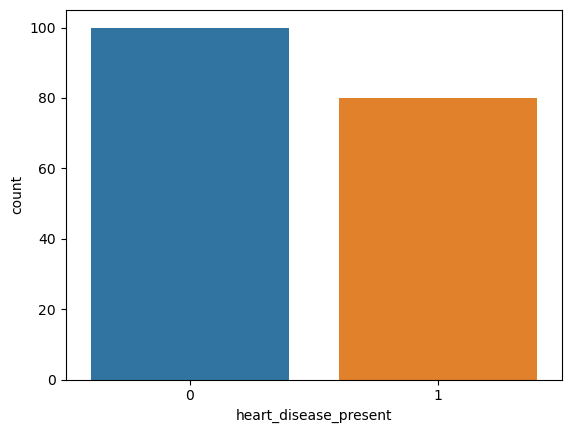

In [20]:
sns.countplot(x=df.heart_disease_present)
plt.show()

In [21]:
#Sweetviz Report for univariate data analysis
my_report = sv.analyze(df)

my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


 ***ii).Bivariate Analysis***

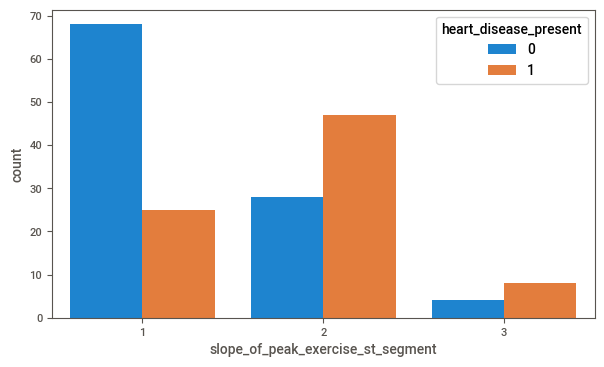

In [22]:
# Analyse the relationship between slope_of_peak_exercise_st_segmen & heart_disease_present

plt.figure(figsize=(7,4))
sns.countplot(data=df,x='slope_of_peak_exercise_st_segment',hue='heart_disease_present')
plt.show()

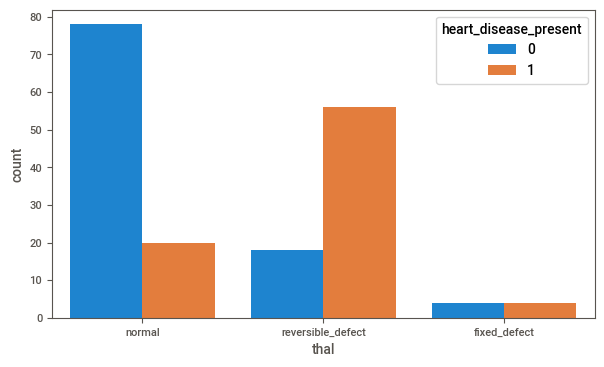

In [23]:
# Analyse the relationship between thal & heart_disease_present

plt.figure(figsize=(7,4))
sns.countplot(data=df,x='thal',hue='heart_disease_present')
plt.show()

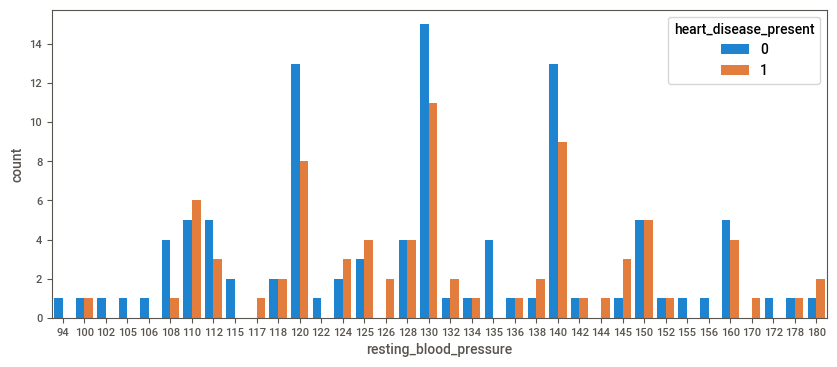

In [24]:
# Analyse the relationship between resting_blood_pressure & heart_disease_present

plt.figure(figsize=(10,4))
sns.countplot(data=df,x='resting_blood_pressure',hue='heart_disease_present')
plt.show()

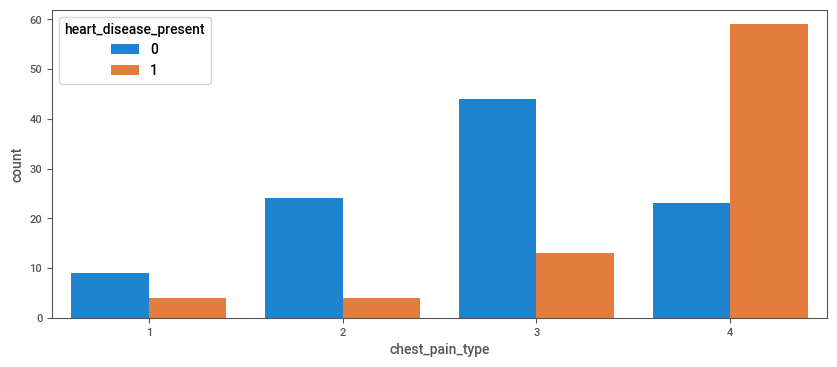

In [25]:
# Analyse the relationship between chest_pain_type & heart_disease_present

plt.figure(figsize=(10,4))
sns.countplot(data=df,x='chest_pain_type',hue='heart_disease_present')
plt.show()

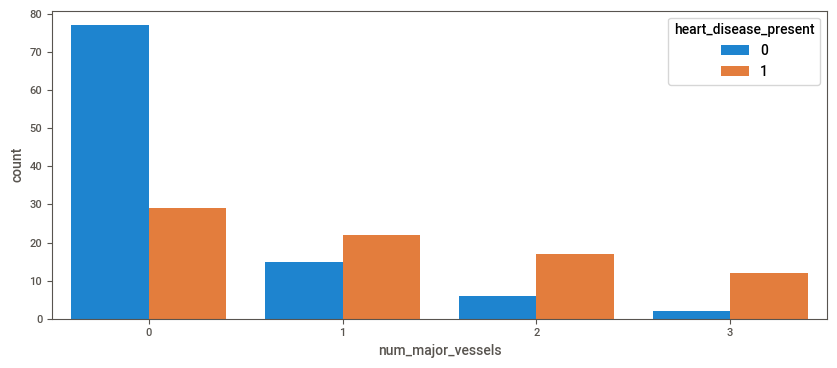

In [26]:
# Analyse the relationship between num_major_vessels & heart_disease_present

plt.figure(figsize=(10,4))
sns.countplot(data=df,x='num_major_vessels',hue='heart_disease_present')
plt.show()

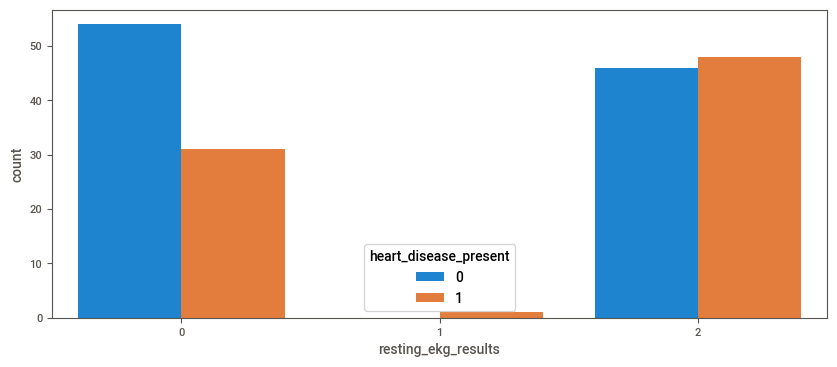

In [27]:
# Analyse the relationship between resting_ekg_results & heart_disease_present

plt.figure(figsize=(10,4))
sns.countplot(data=df,x='resting_ekg_results',hue='heart_disease_present')
plt.show()

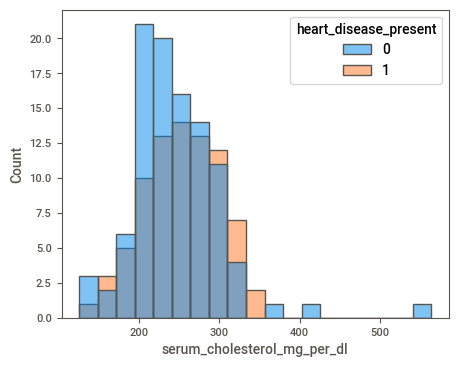

In [28]:
# Analyse the relationship between serum_cholesterol_mg_per_dl & heart_disease_present

plt.figure(figsize=(5,4))
sns.histplot(data=df,x='serum_cholesterol_mg_per_dl',hue='heart_disease_present')
plt.show()

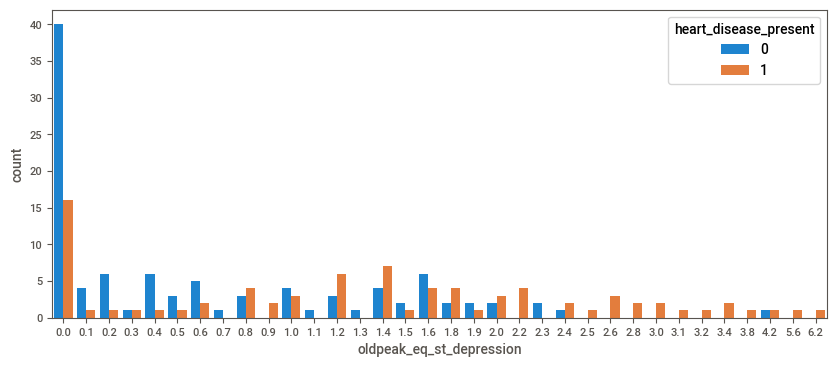

In [29]:
# Analyse the relationship between oldpeak_eq_st_depression & heart_disease_present

plt.figure(figsize=(10,4))
sns.countplot(data=df,x='oldpeak_eq_st_depression',hue='heart_disease_present')
plt.show()

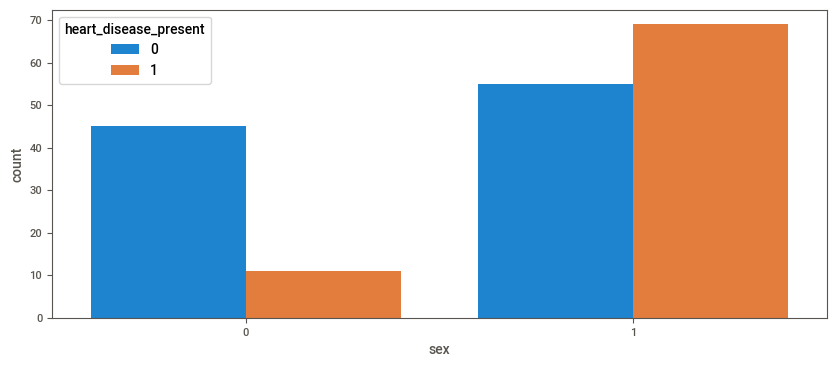

In [30]:
# Analyse the relationship between sex & heart_disease_present

plt.figure(figsize=(10,4))
sns.countplot(data=df,x='sex',hue='heart_disease_present')
plt.show()

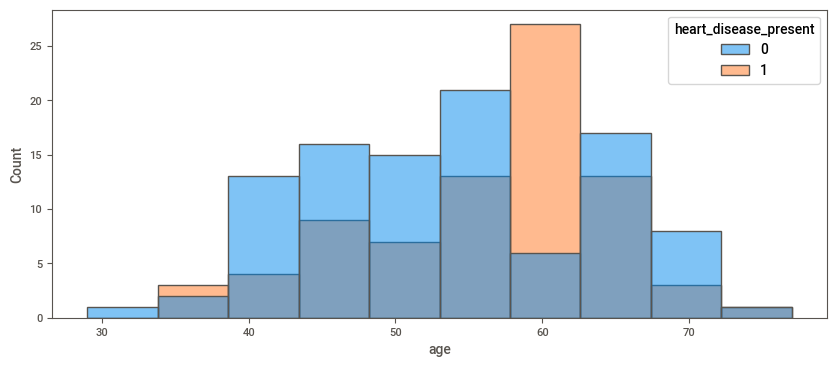

In [31]:
# Analyse the relationship between age & heart_disease_present

plt.figure(figsize=(10,4))
sns.histplot(data=df,x='age',hue='heart_disease_present')
plt.show()

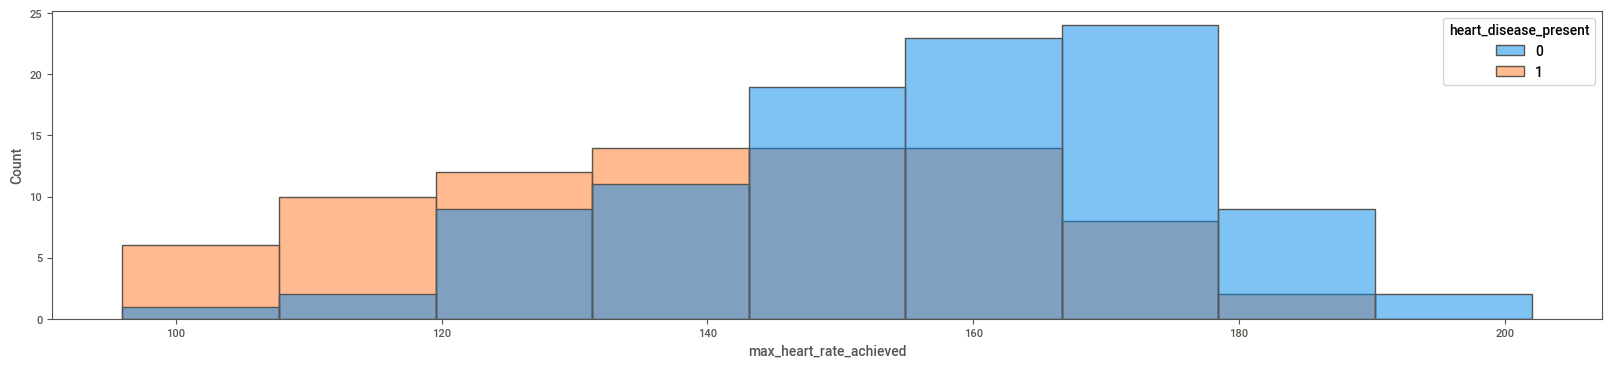

In [32]:
# Analyse the relationship between max_heart_rate_achieved & heart_disease_present

plt.figure(figsize=(20,4))
sns.histplot(data=df,x='max_heart_rate_achieved',hue='heart_disease_present')
plt.show()

***iii).Multivariate Analysis***

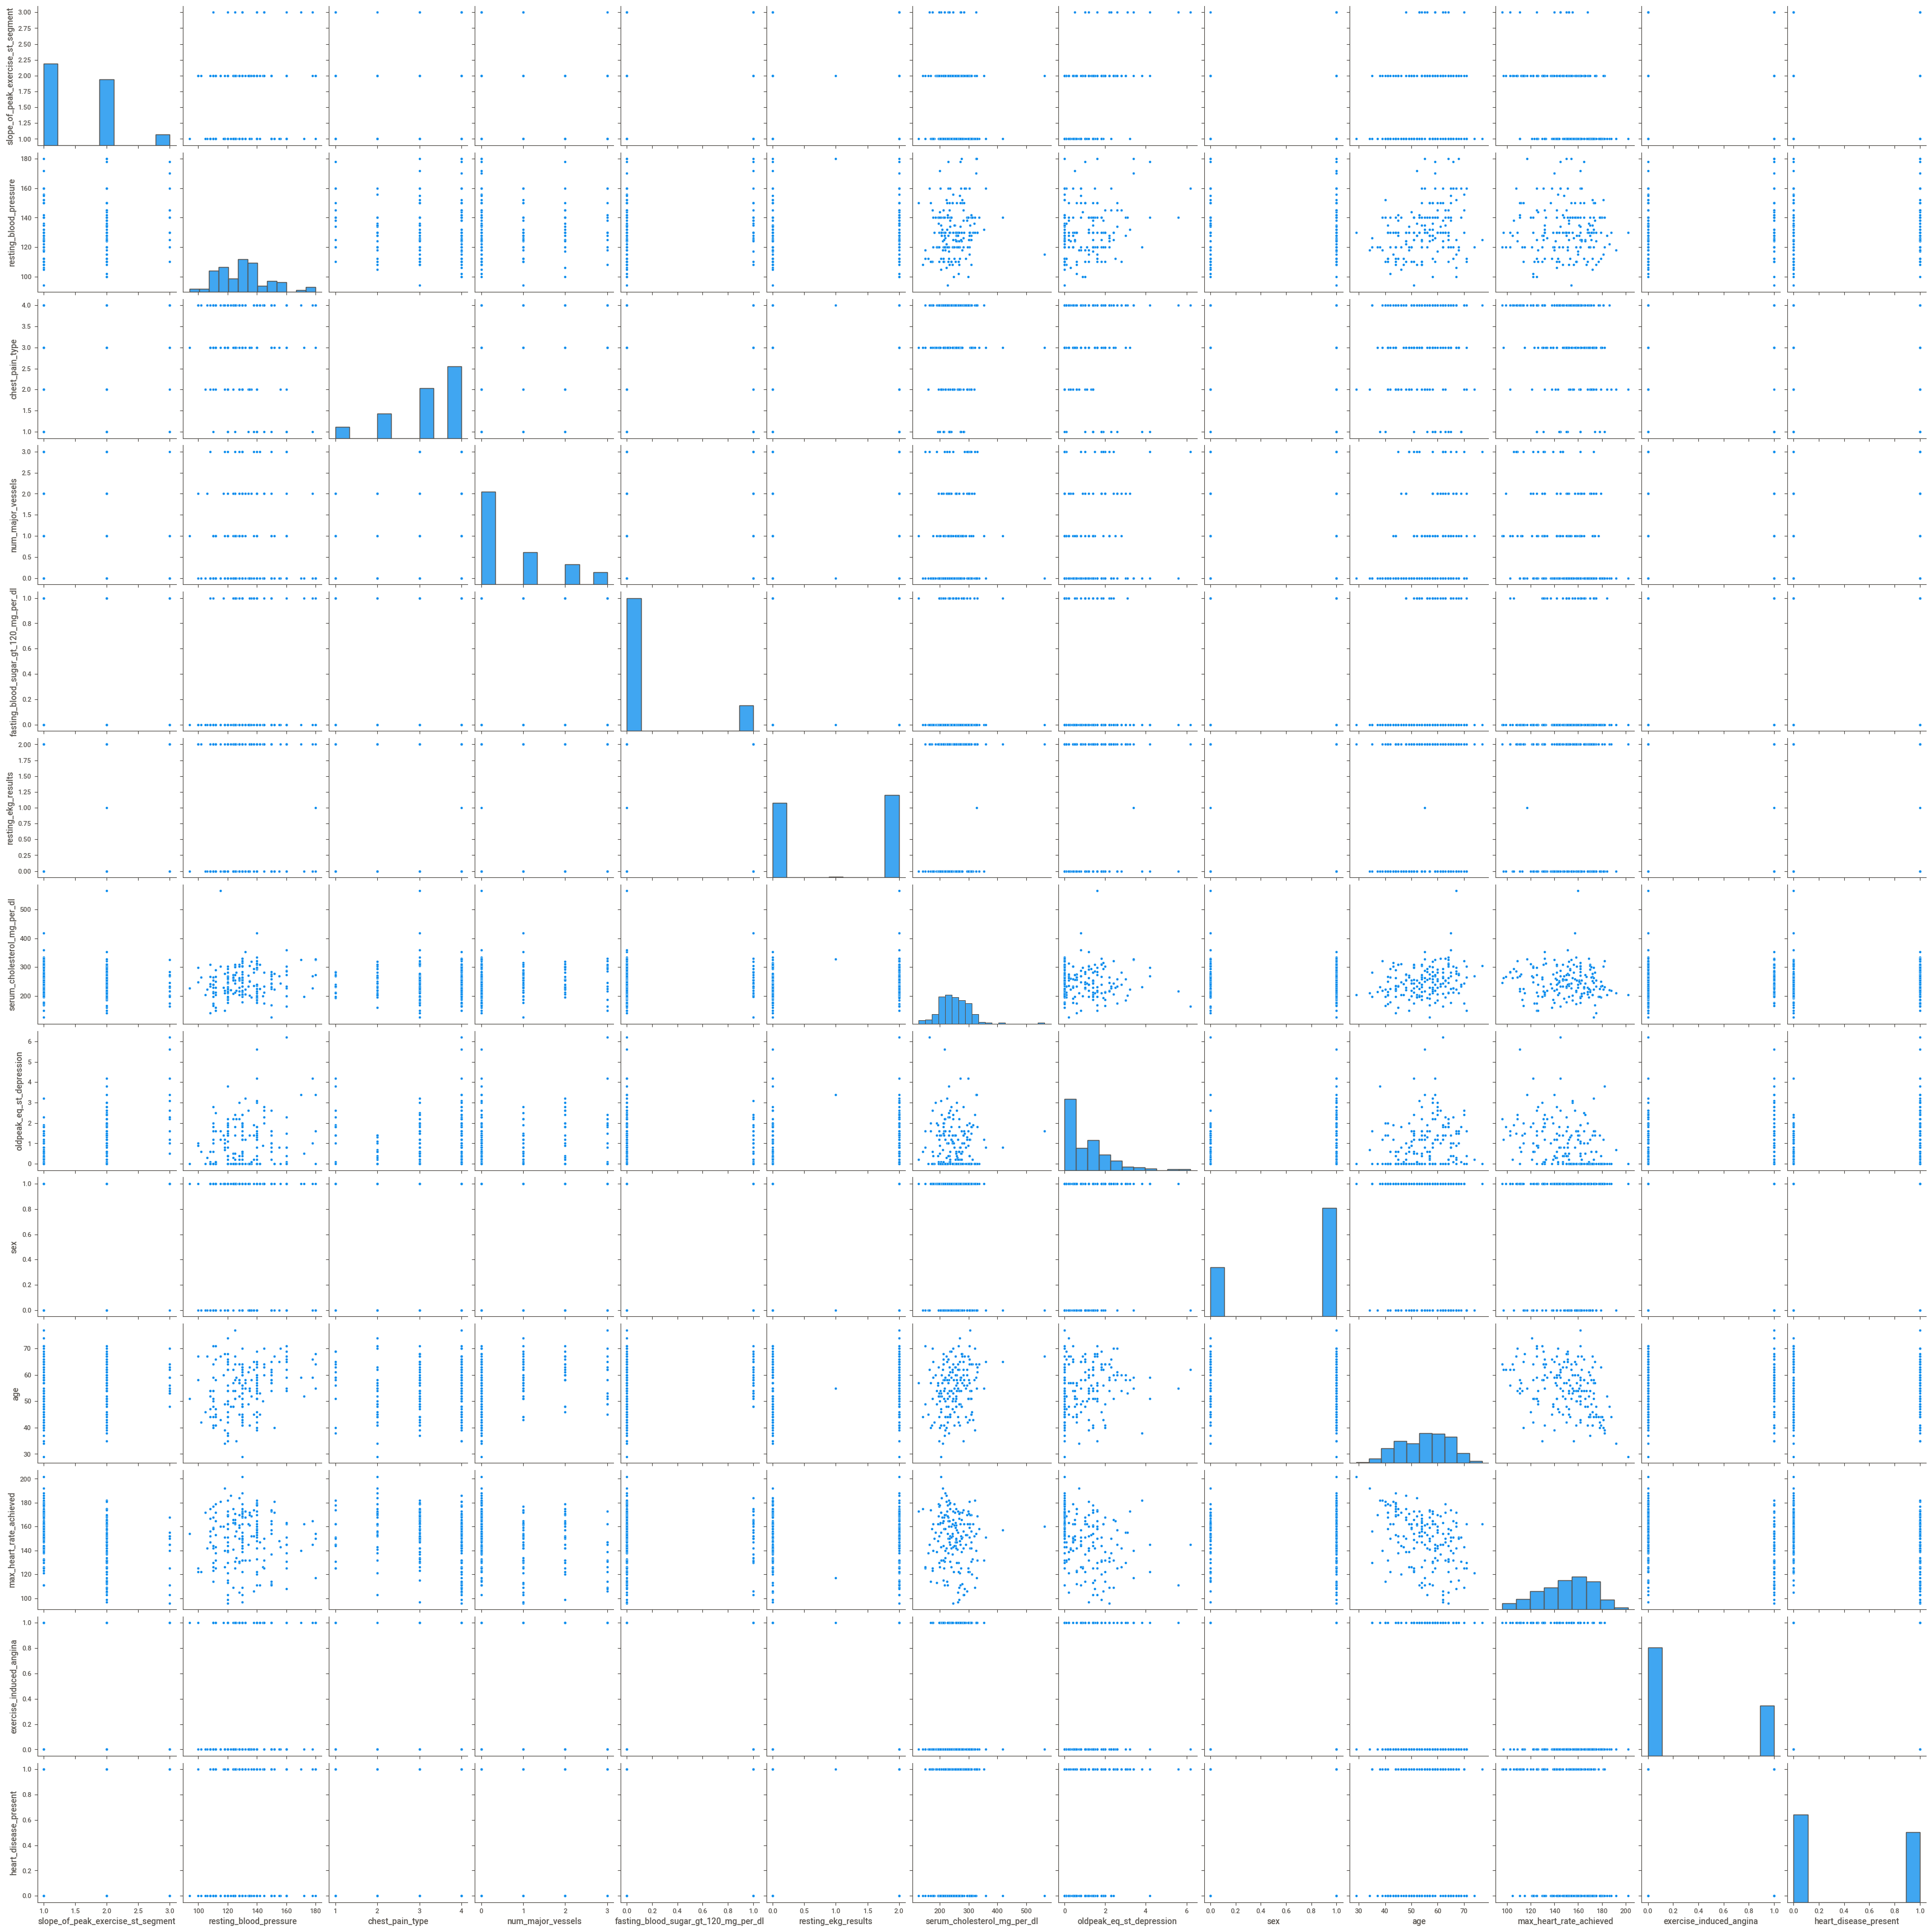

In [33]:
sns.pairplot(df)
plt.show()

# 7.Data Preprocessing.

***Outliers***

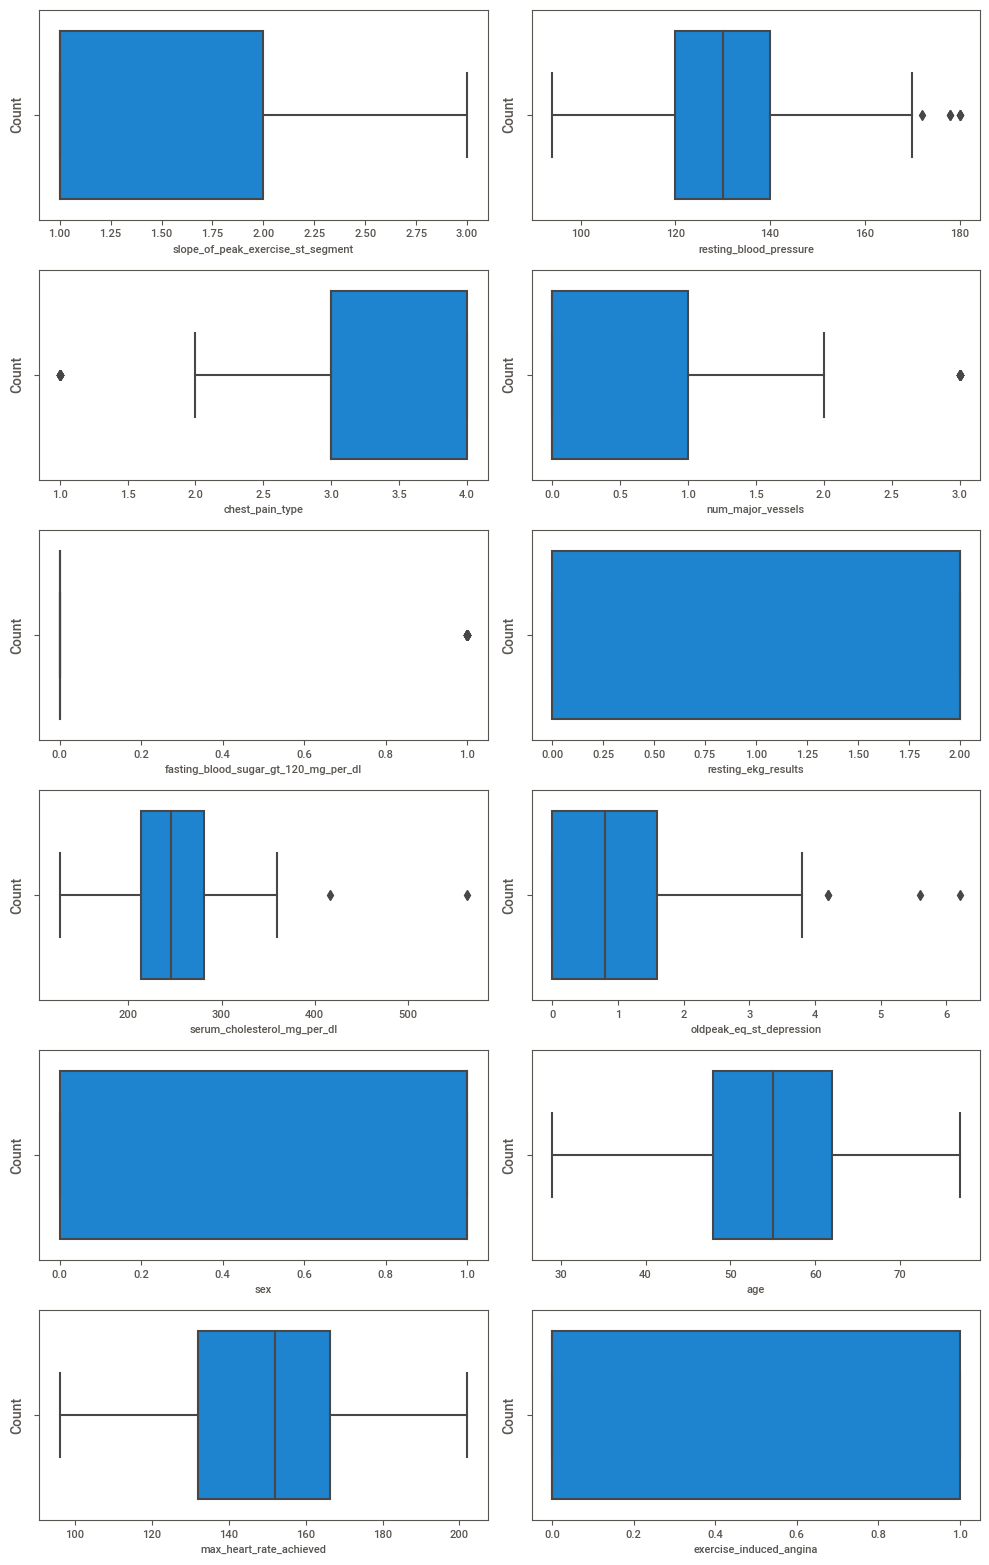

In [34]:
# check outliers.

plt.figure(figsize=(10,18),facecolor='white')
plotnumber=1 # Initialize count
for column in df.drop(columns=["thal","heart_disease_present"],axis=1):
    if plotnumber < 14:# Total no.of column of range (1 to 14)
        ax=plt.subplot(7,2,plotnumber) # It mention rows and column in canva
        sns.boxplot(x=df[column])
        plt.xlabel(column,fontsize=8)
        plt.ylabel("Count",fontsize=10)
    plotnumber +=1
plt.tight_layout() # Fit Your Plot Properly.


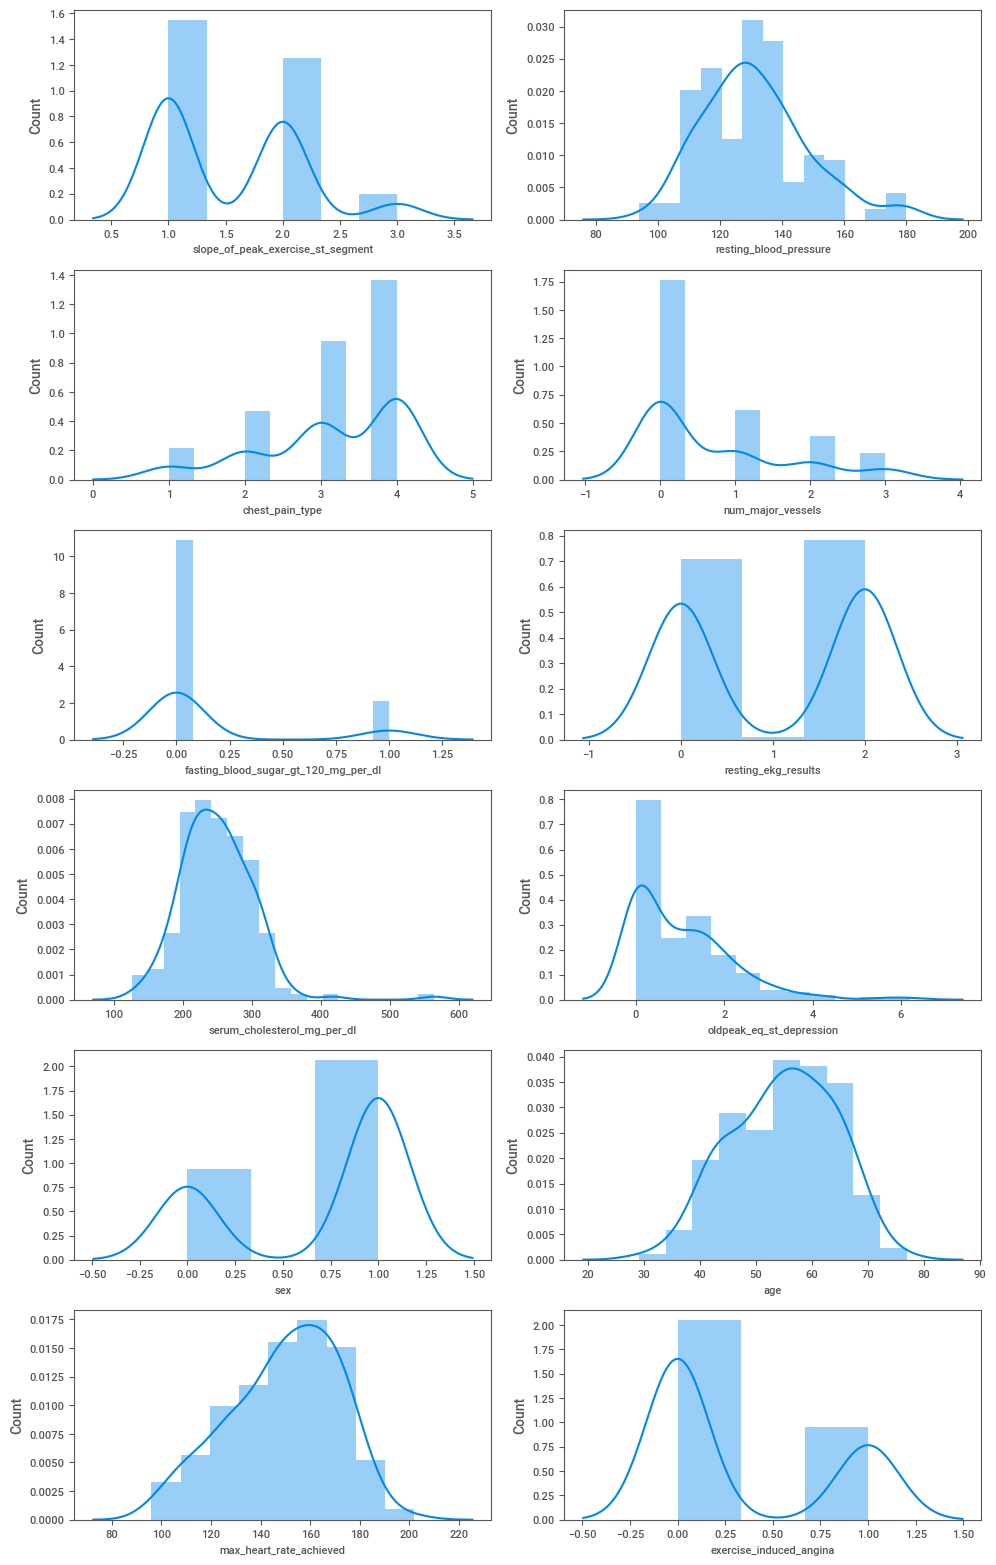

In [35]:
# check outliers.

plt.figure(figsize=(10,18),facecolor='white')
plotnumber=1 # Initialize count
for column in df.drop(columns=["thal","heart_disease_present"],axis=1):
    if plotnumber < 14:# Total no.of column of range (1 to 14)
        ax=plt.subplot(7,2,plotnumber) # It mention rows and column in canva
        sns.distplot(x=df[column])
        plt.xlabel(column,fontsize=8)
        plt.ylabel("Count",fontsize=10)
    plotnumber +=1
plt.tight_layout() # Fit Your Plot Properly.


slope_of_peak_exercise_st_segment

Skewness is: 0.660585714798187


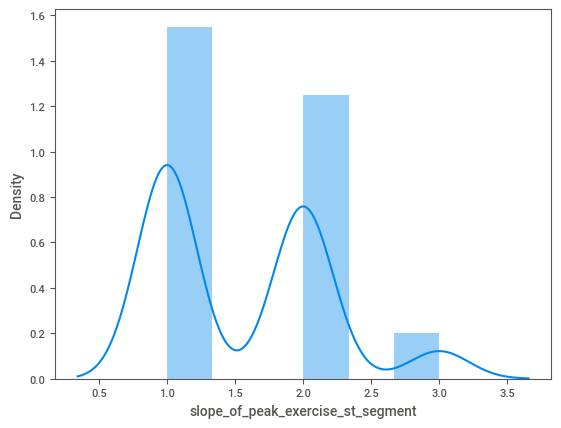

resting_blood_pressure

Skewness is: 0.6515915088698496


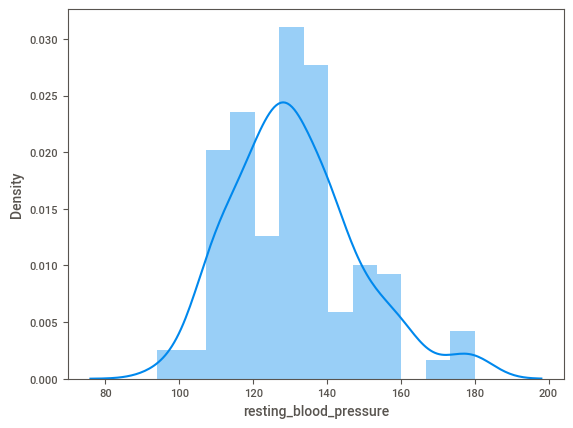

chest_pain_type

Skewness is: -0.8421645409638178


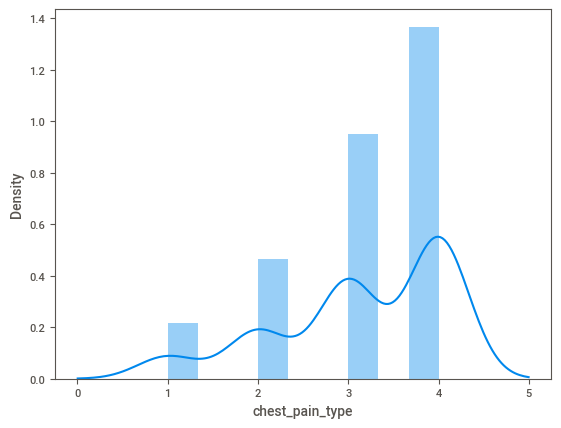

num_major_vessels

Skewness is: 1.1582430715853718


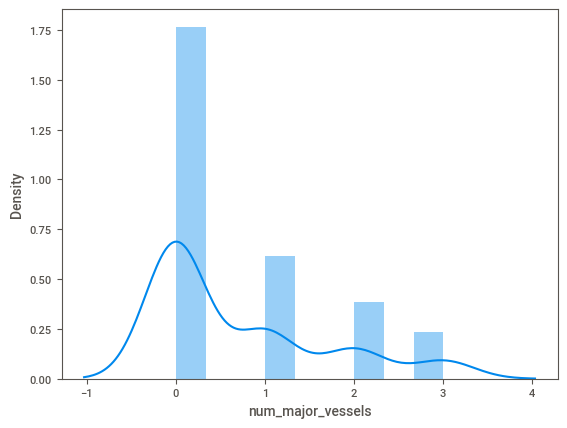

fasting_blood_sugar_gt_120_mg_per_dl

Skewness is: 1.8436240212843253


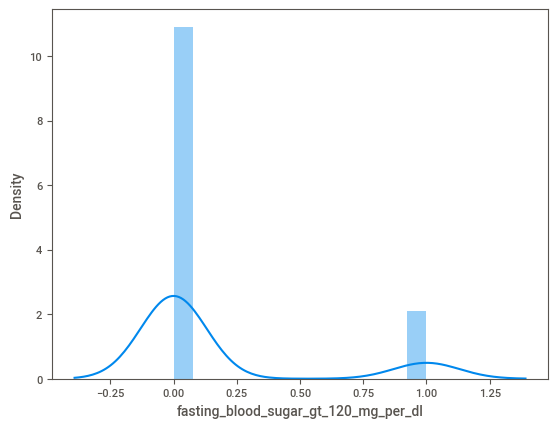

resting_ekg_results

Skewness is: -0.10012405930078504


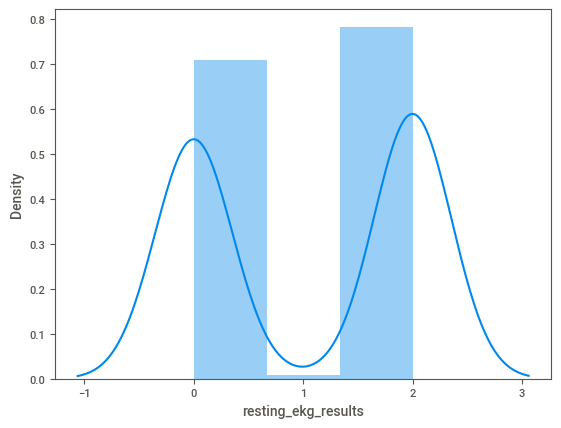

serum_cholesterol_mg_per_dl

Skewness is: 1.2632907841049


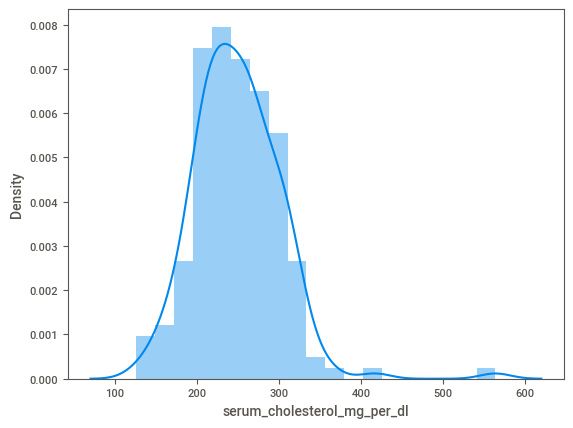

oldpeak_eq_st_depression

Skewness is: 1.4948214849547024


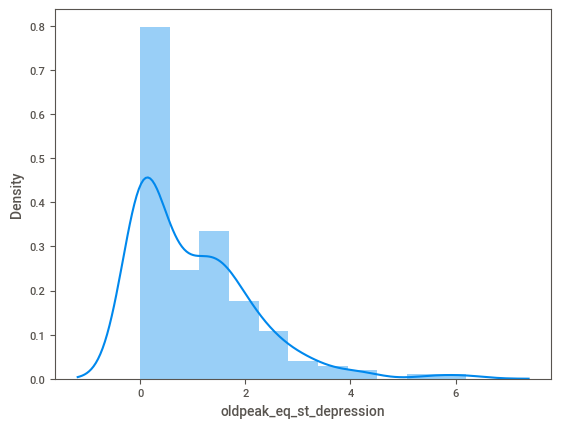

sex

Skewness is: -0.8160261132534429


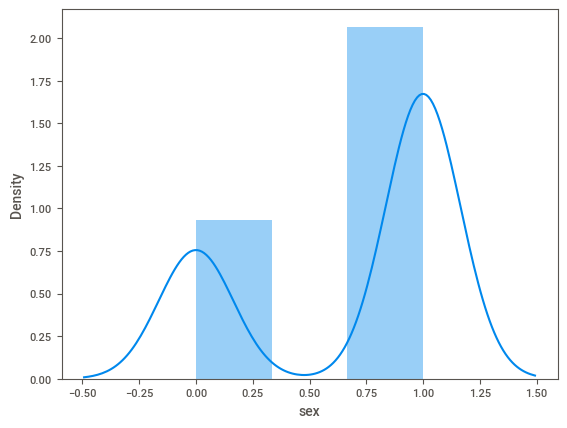

age

Skewness is: -0.19750200100335744


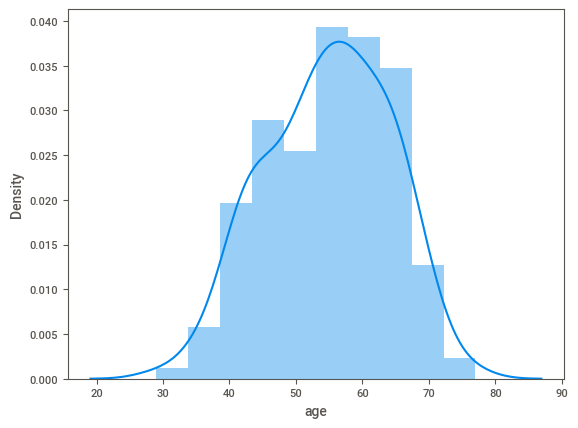

max_heart_rate_achieved

Skewness is: -0.3904163075399945


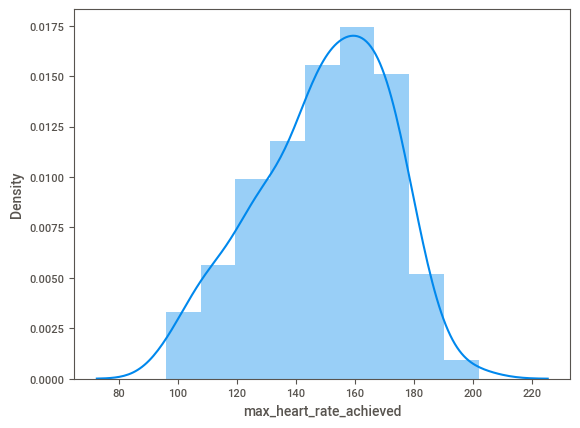

exercise_induced_angina

Skewness is: 0.7882318002900207


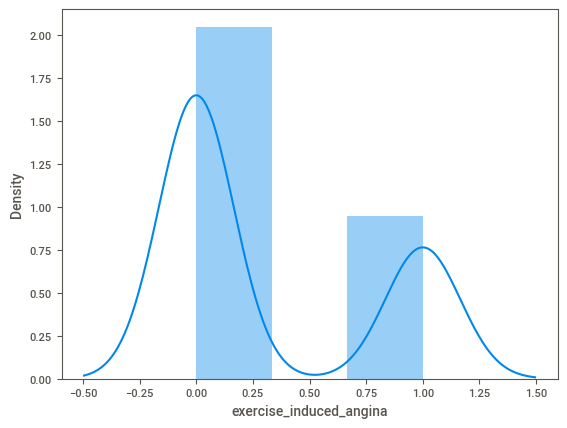

In [36]:
# check skewness.

for i in df.drop(columns=["thal","heart_disease_present"]):
    print(i)
    print()
    print("Skewness is:",skew(df[i]))
    
    plt.figure()
    sns.distplot(df[i])
    plt.show()


***resting_blood_pressure***

In [37]:
#Basic info about column
df["resting_blood_pressure"].describe()

count    180.000000
mean     131.311111
std       17.010443
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      180.000000
Name: resting_blood_pressure, dtype: float64

In [38]:
# To find Q1 and Q3.
# To calculate quantiles using quantile().

Q1=df['resting_blood_pressure'].quantile(0.25) # 25%
print("lower_quantile",Q1)

Q3=df['resting_blood_pressure'].quantile(0.75) # 75%
print("upper_quantile",Q3)


lower_quantile 120.0
upper_quantile 140.0


In [39]:
# To Find IQR.

IQR=Q3-Q1
IQR

20.0

In [40]:
# To find lower limit and upper limit

lower_limit=Q1-1.5*IQR
print("lower_limit",lower_limit)

upper_limit=Q3+1.5*IQR
print("upper_limit",upper_limit)

lower_limit 90.0
upper_limit 170.0


In [41]:
# To find value above upper_limit.

df.loc[df['resting_blood_pressure']>upper_limit] 

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
4,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0
33,1,normal,180,4,0,0,0,325,0.0,0,64,154,1,0
72,1,reversible_defect,172,3,0,1,0,199,0.5,1,52,162,0,0
75,2,reversible_defect,178,4,2,1,0,228,1.0,0,66,165,1,1
113,2,reversible_defect,180,3,0,1,2,274,1.6,1,68,150,1,1
176,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1


In [42]:
# To find percentage of outliers.

len(df.loc[df['resting_blood_pressure']>upper_limit] )/len(df)

0.03333333333333333

In [43]:
# To find value below lower_limit.

df.loc[df['resting_blood_pressure']<lower_limit] # There are no data in lower limit.

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present


In [44]:
#To replace outliers with median value
df.loc[df['resting_blood_pressure']>upper_limit,"resting_blood_pressure"]=df['resting_blood_pressure'].median()

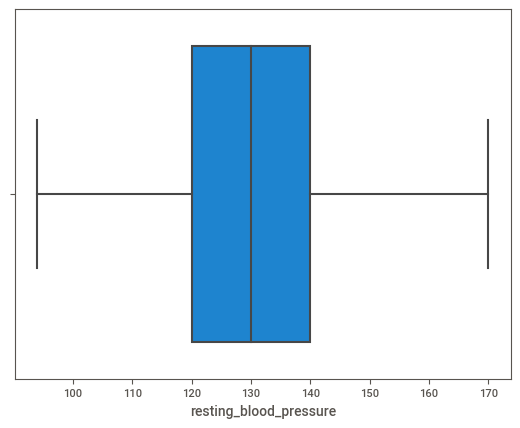

In [45]:
# Check Outliers

sns.boxplot(x=df.resting_blood_pressure)
plt.show()

 ***chest_pain_type***

In [46]:
#Basic info about column
df["chest_pain_type"].describe()

count    180.000000
mean       3.155556
std        0.938454
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: chest_pain_type, dtype: float64

In [47]:
# To find Q1 and Q3.
# To calculate quantiles using quantile().

Q1=df['chest_pain_type'].quantile(0.25) # 25%
print("lower_quantile",Q1)

Q3=df['chest_pain_type'].quantile(0.75) # 75%
print("upper_quantile",Q3)

lower_quantile 3.0
upper_quantile 4.0


In [48]:
# To Find IQR.

IQR=Q3-Q1
IQR

1.0

In [49]:
# To find lower limit and upper limit

lower_limit=Q1-1.5*IQR
print("lower_limit",lower_limit)

upper_limit=Q3+1.5*IQR
print("upper_limit",upper_limit)

lower_limit 1.5
upper_limit 5.5


In [50]:
# To find value above upper_limit.

df.loc[df['chest_pain_type']>upper_limit] # There is no data in upper data

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present


In [51]:
# To find percentage of outliers.

len(df.loc[df['chest_pain_type']<lower_limit] )/len(df)

0.07222222222222222

In [52]:
# To find value below lower_limit.

df.loc[df['chest_pain_type']<lower_limit] # There are  data in lower limit.

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
4,3,reversible_defect,130,1,0,0,2,270,4.2,1,59,145,0,0
14,2,reversible_defect,120,1,0,0,0,231,3.8,1,38,182,1,1
97,2,normal,160,1,1,1,2,234,0.1,1,69,131,0,0
99,1,normal,150,1,0,1,2,283,1.0,0,58,162,0,0
108,1,normal,125,1,1,0,2,213,1.4,1,51,125,1,0
120,2,normal,138,1,1,1,2,282,1.4,1,65,174,0,1
141,2,reversible_defect,120,1,0,0,2,193,1.9,1,56,162,0,0
146,1,reversible_defect,140,1,0,0,0,199,1.4,1,40,178,1,0
147,2,normal,134,1,2,0,0,234,2.6,1,61,145,0,1
155,1,normal,160,1,0,0,2,273,0.0,1,59,125,0,1


In [53]:
#To replace outliers value with mean
df.loc[df['chest_pain_type']<lower_limit,"chest_pain_type"]=df['chest_pain_type'].median()

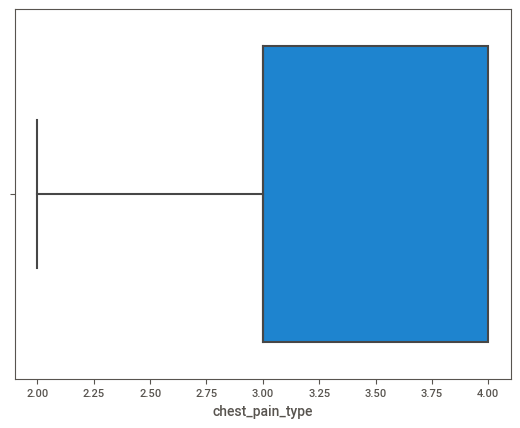

In [54]:
# Check Outliers

sns.boxplot(x=df.chest_pain_type)
plt.show()

***num_major_vessels***

In [55]:
#Basic info about column
df["num_major_vessels"].describe()

count    180.000000
mean       0.694444
std        0.969347
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        3.000000
Name: num_major_vessels, dtype: float64

In [56]:
# To find Q1 and Q3.
# To calculate quantiles using quantile().

Q1=df['num_major_vessels'].quantile(0.25) # 25%
print("lower_quantile",Q1)

Q3=df['num_major_vessels'].quantile(0.75) # 75%
print("upper_quantile",Q3)

lower_quantile 0.0
upper_quantile 1.0


In [57]:
# To Find IQR.

IQR=Q3-Q1
IQR

1.0

In [58]:
# To find lower limit and upper limit

lower_limit=Q1-1.5*IQR
print("lower_limit",lower_limit)

upper_limit=Q3+1.5*IQR
print("upper_limit",upper_limit)

lower_limit -1.5
upper_limit 2.5


In [59]:
# To find value above upper_limit.

df.loc[df['num_major_vessels']>upper_limit] #There has some records in upper limit

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
2,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
21,1,reversible_defect,108,4,3,1,0,233,0.1,1,52,147,0,0
31,2,reversible_defect,150,4,3,0,2,225,1.0,0,65,114,0,1
52,1,reversible_defect,130,4,3,1,2,330,1.8,1,63,132,1,1
66,2,normal,130,4,3,0,2,322,2.4,1,70,109,0,1
69,2,reversible_defect,120,3,3,0,0,188,2.0,1,49,139,0,1
85,1,normal,118,3,3,0,2,149,0.8,1,49,126,0,1
112,2,reversible_defect,140,4,3,0,0,298,4.2,1,51,122,1,1
119,2,normal,138,4,3,1,0,294,1.9,0,62,106,0,1
123,1,normal,130,3,3,1,2,246,0.0,1,53,173,0,0


In [60]:
# To find percentage of outliers.

len(df.loc[df['num_major_vessels']>upper_limit] )/len(df)

0.07777777777777778

In [61]:
# To find value below lower_limit.

df.loc[df['num_major_vessels']<lower_limit] # There are no data in lower limit.

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present


In [62]:
#To replace outlier values with mean
df.loc[df['num_major_vessels']>upper_limit,"num_major_vessels"]=df['num_major_vessels'].median()

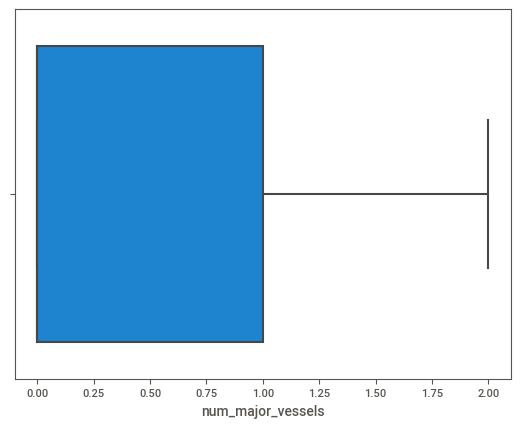

In [63]:
# Check Outliers

sns.boxplot(x=df.num_major_vessels)
plt.show()

***serum_cholesterol_mg_per_dl***

In [64]:
#Basic info about column
df["serum_cholesterol_mg_per_dl"].describe()

count    180.000000
mean     249.211111
std       52.717969
min      126.000000
25%      213.750000
50%      245.500000
75%      281.250000
max      564.000000
Name: serum_cholesterol_mg_per_dl, dtype: float64

In [65]:
# To find Q1 and Q3.
# To calculate quantiles using quantile().

Q1=df['serum_cholesterol_mg_per_dl'].quantile(0.25) # 25%
print("lower_quantile",Q1)

Q3=df['serum_cholesterol_mg_per_dl'].quantile(0.75) # 75%
print("upper_quantile",Q3)

lower_quantile 213.75
upper_quantile 281.25


In [66]:
# To Find IQR.

IQR=Q3-Q1
IQR

67.5

In [67]:
# To find lower limit and upper limit

lower_limit=Q1-1.5*IQR
print("lower_limit",lower_limit)

upper_limit=Q3+1.5*IQR
print("upper_limit",upper_limit)

lower_limit 112.5
upper_limit 382.5


In [68]:
# To find value above upper_limit.

df.loc[df['serum_cholesterol_mg_per_dl']>upper_limit] #There has some records in upper limit

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
43,1,normal,140,3,1,1,2,417,0.8,0,65,157,0,0
60,2,reversible_defect,115,3,0,0,2,564,1.6,0,67,160,0,0


In [69]:
# To find percentage of outliers.

len(df.loc[df['serum_cholesterol_mg_per_dl']>upper_limit] )/len(df)

0.011111111111111112

In [70]:
# To find value below lower_limit.

df.loc[df['serum_cholesterol_mg_per_dl']<lower_limit] # There are no data in lower limit.

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present


In [71]:
#To replace outlires values with mean
df.loc[df['serum_cholesterol_mg_per_dl']>upper_limit,"serum_cholesterol_mg_per_dl"]=df['serum_cholesterol_mg_per_dl'].median()

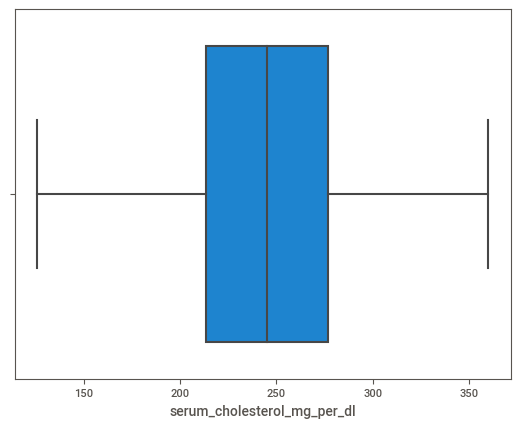

In [72]:
# Check Outliers

sns.boxplot(x=df.serum_cholesterol_mg_per_dl)
plt.show()

***oldpeak_eq_st_depression***

In [73]:
#Basic info
df["oldpeak_eq_st_depression"].describe()

count    180.000000
mean       1.010000
std        1.121357
min        0.000000
25%        0.000000
50%        0.800000
75%        1.600000
max        6.200000
Name: oldpeak_eq_st_depression, dtype: float64

In [74]:
# To find Q1 and Q3.
# To calculate quantiles using quantile().

Q1=df['oldpeak_eq_st_depression'].quantile(0.25) # 25%
print("lower_quantile",Q1)

Q3=df['oldpeak_eq_st_depression'].quantile(0.75) # 75%
print("upper_quantile",Q3)

lower_quantile 0.0
upper_quantile 1.6


In [75]:
# To Find IQR.

IQR=Q3-Q1
IQR

1.6

In [76]:
# To find lower limit and upper limit

lower_limit=Q1-1.5*IQR
print("lower_limit",lower_limit)

upper_limit=Q3+1.5*IQR
print("upper_limit",upper_limit)

lower_limit -2.4000000000000004
upper_limit 4.0


In [77]:
# To find value above upper_limit.

df.loc[df['oldpeak_eq_st_depression']>upper_limit] #There has some records in upper limit

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
4,3,reversible_defect,130,3,0,0,2,270.0,4.2,1,59,145,0,0
112,2,reversible_defect,140,4,0,0,0,298.0,4.2,1,51,122,1,1
140,3,reversible_defect,140,4,0,0,0,217.0,5.6,1,55,111,1,1
162,3,reversible_defect,160,4,0,0,2,164.0,6.2,0,62,145,0,1


In [78]:
# To find percentage of outliers.

len(df.loc[df['oldpeak_eq_st_depression']>upper_limit] )/len(df)

0.022222222222222223

In [79]:
# To find value below lower_limit.

df.loc[df['oldpeak_eq_st_depression']<lower_limit] # There are no data in lower limit.

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present


In [80]:
#To replace outliers values with mean
df.loc[df['oldpeak_eq_st_depression']>upper_limit,"oldpeak_eq_st_depression"]=df['oldpeak_eq_st_depression'].median()

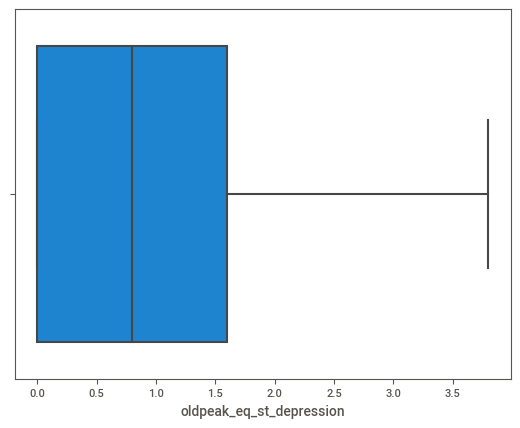

In [81]:
# Check Outliers

sns.boxplot(x=df.oldpeak_eq_st_depression)
plt.show()

***Handling a Categorical data***

In [82]:
#To cheak categorical data and numerical data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   slope_of_peak_exercise_st_segment     180 non-null    int64  
 1   thal                                  180 non-null    object 
 2   resting_blood_pressure                180 non-null    int64  
 3   chest_pain_type                       180 non-null    int64  
 4   num_major_vessels                     180 non-null    int64  
 5   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 6   resting_ekg_results                   180 non-null    int64  
 7   serum_cholesterol_mg_per_dl           180 non-null    float64
 8   oldpeak_eq_st_depression              180 non-null    float64
 9   sex                                   180 non-null    int64  
 10  age                                   180 non-null    int64  
 11  max_heart_rate_achi

In [83]:
df["thal"].value_counts()

thal
normal               98
reversible_defect    74
fixed_defect          8
Name: count, dtype: int64

In [84]:
# Manually Mapping

df.thal=df.thal.map({'normal':2,'reversible_defect':1,'fixed_defect':0})

In [85]:
df

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,2,128,2,0,0,2,308.0,0.0,1,45,170,0,0
1,2,2,110,3,0,0,0,214.0,1.6,0,54,158,0,0
2,1,2,125,4,0,0,2,304.0,0.0,1,77,162,1,1
3,1,1,152,4,0,0,0,223.0,0.0,1,40,181,0,1
4,3,1,130,3,0,0,2,270.0,0.8,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2,1,125,4,2,1,0,254.0,0.2,1,67,163,0,1
176,2,2,130,4,0,0,1,327.0,3.4,0,55,117,1,1
177,2,1,125,3,0,0,0,309.0,1.8,1,64,131,1,1
178,1,2,124,3,2,1,0,255.0,0.0,1,48,175,0,0


***Scaling***

In [86]:
df.sample(10)

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
18,1,2,130,2,0,0,2,204.0,0.0,1,29,202,0,0
137,2,2,150,4,0,0,0,244.0,1.4,0,62,154,1,1
48,2,1,120,2,1,0,2,281.0,1.4,1,62,103,0,1
32,3,1,140,4,0,1,2,203.0,3.1,1,53,155,1,1
29,1,2,110,3,0,0,0,175.0,0.6,1,51,123,0,0
88,1,2,150,3,0,0,0,168.0,1.6,1,57,174,0,0
106,1,1,150,3,0,0,2,232.0,1.6,1,54,165,0,0
44,1,2,108,3,0,0,2,267.0,0.0,0,54,167,0,0
118,2,1,132,4,1,0,0,353.0,1.2,1,55,132,1,1
40,2,2,150,3,0,1,0,243.0,1.0,1,61,137,1,0


In [87]:
#To apply MinMaxScaler on given column
scale=MinMaxScaler()

df[['resting_blood_pressure','serum_cholesterol_mg_per_dl','oldpeak_eq_st_depression','age','max_heart_rate_achieved']]=scale.fit_transform(df[['resting_blood_pressure','serum_cholesterol_mg_per_dl','oldpeak_eq_st_depression','age','max_heart_rate_achieved']])

In [88]:
df

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,2,0.447368,2,0,0,2,0.777778,0.000000,1,0.333333,0.698113,0,0
1,2,2,0.210526,3,0,0,0,0.376068,0.421053,0,0.520833,0.584906,0,0
2,1,2,0.407895,4,0,0,2,0.760684,0.000000,1,1.000000,0.622642,1,1
3,1,1,0.763158,4,0,0,0,0.414530,0.000000,1,0.229167,0.801887,0,1
4,3,1,0.473684,3,0,0,2,0.615385,0.210526,1,0.625000,0.462264,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2,1,0.407895,4,2,1,0,0.547009,0.052632,1,0.791667,0.632075,0,1
176,2,2,0.473684,4,0,0,1,0.858974,0.894737,0,0.541667,0.198113,1,1
177,2,1,0.407895,3,0,0,0,0.782051,0.473684,1,0.729167,0.330189,1,1
178,1,2,0.394737,3,2,1,0,0.551282,0.000000,1,0.395833,0.745283,0,0


# 8.Feature Engineering.

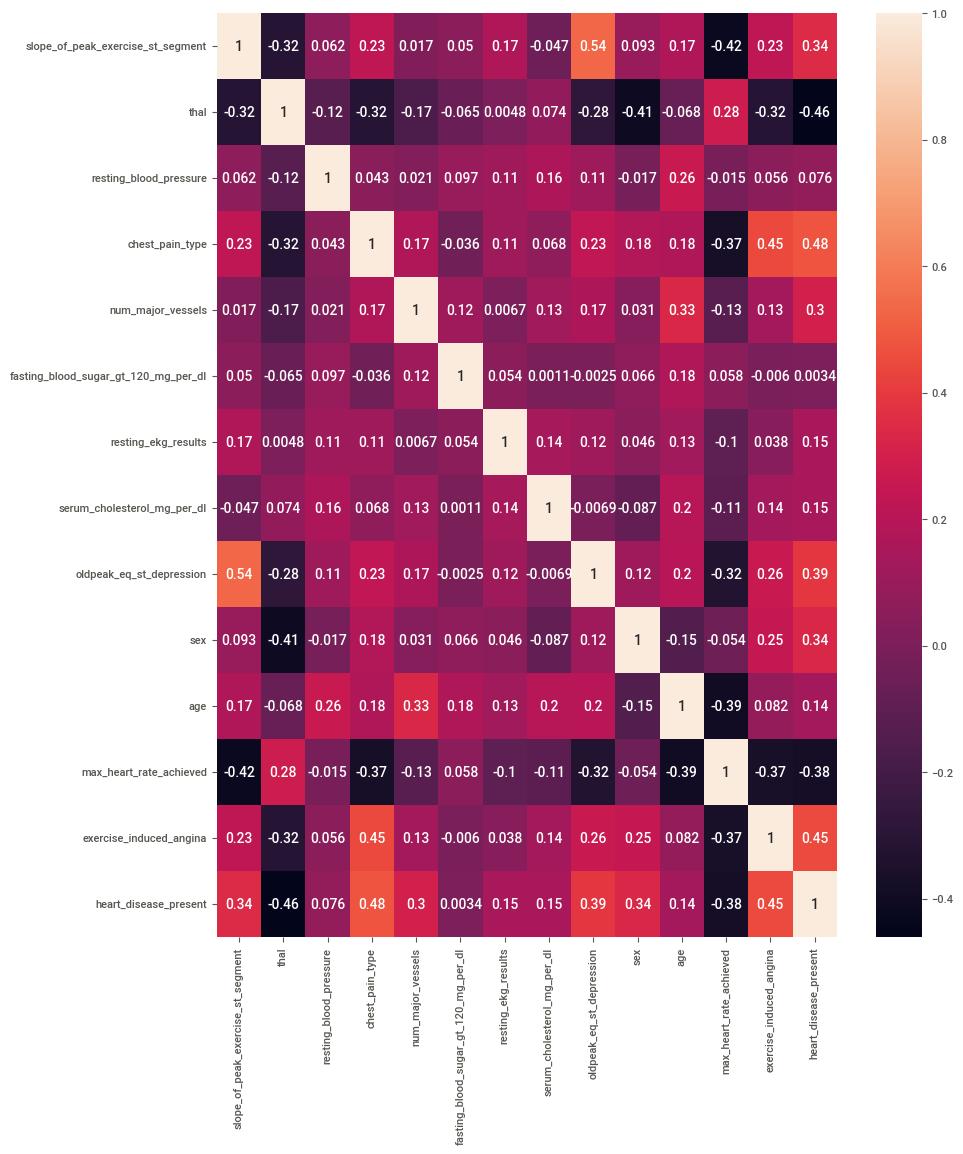

In [89]:
plt.figure(figsize=(10,12))#canvas size
sns.heatmap(df.corr(),annot=True)
plt.show()

# 9.Split Data into x and y

In [90]:
## Creating independent and dependent variable

X = df.drop('heart_disease_present', axis=1) #independent variable
y = df.heart_disease_present #dependent variable

In [91]:
#To cheak the columns in X
X

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,1,2,0.447368,2,0,0,2,0.777778,0.000000,1,0.333333,0.698113,0
1,2,2,0.210526,3,0,0,0,0.376068,0.421053,0,0.520833,0.584906,0
2,1,2,0.407895,4,0,0,2,0.760684,0.000000,1,1.000000,0.622642,1
3,1,1,0.763158,4,0,0,0,0.414530,0.000000,1,0.229167,0.801887,0
4,3,1,0.473684,3,0,0,2,0.615385,0.210526,1,0.625000,0.462264,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2,1,0.407895,4,2,1,0,0.547009,0.052632,1,0.791667,0.632075,0
176,2,2,0.473684,4,0,0,1,0.858974,0.894737,0,0.541667,0.198113,1
177,2,1,0.407895,3,0,0,0,0.782051,0.473684,1,0.729167,0.330189,1
178,1,2,0.394737,3,2,1,0,0.551282,0.000000,1,0.395833,0.745283,0


In [92]:
#To cheak the columns in y
y

0      0
1      0
2      1
3      1
4      0
      ..
175    1
176    1
177    1
178    0
179    0
Name: heart_disease_present, Length: 180, dtype: int64

# 10.Split data for trainning and testing.

In [93]:
## preparing training and testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [94]:
#To cheak the size if X_train data
X_train.shape

(135, 13)

In [95]:
#To cheak the size if X_test data
X_test.shape

(45, 13)

In [96]:
#To cheak the size of y_train data
y_train.shape

(135,)

In [97]:
#To cheak the size of y_test data
y_test.shape

(45,)

In [98]:
# Check data of y is balanced or not

y.value_counts() # We get here unbalance data

heart_disease_present
0    100
1     80
Name: count, dtype: int64

In [99]:
#To apply the SMOTE technique to balance the output/target column
smote=SMOTE()
X_smote,y_smote=smote.fit_resample(X_train,y_train)

In [100]:
print("Actual Classes",Counter(y_train)) # Before Balance
print("SMOTE Classes",Counter(y_smote)) # After Balanced

Actual Classes Counter({0: 81, 1: 54})
SMOTE Classes Counter({0: 81, 1: 81})


# 11.Model Building And Evaluation

1.Random Forest
F1 Score:  0.8444444444444443


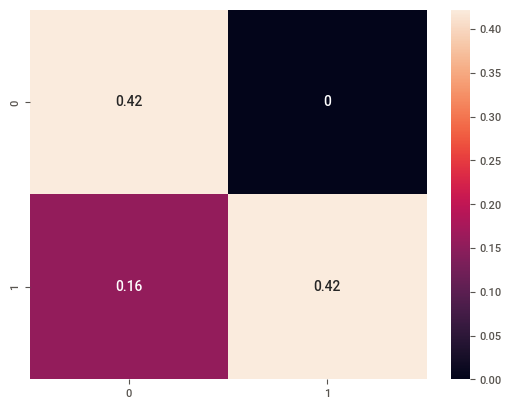

2.Logistic Regression
F1 Score:  0.8695652173913044


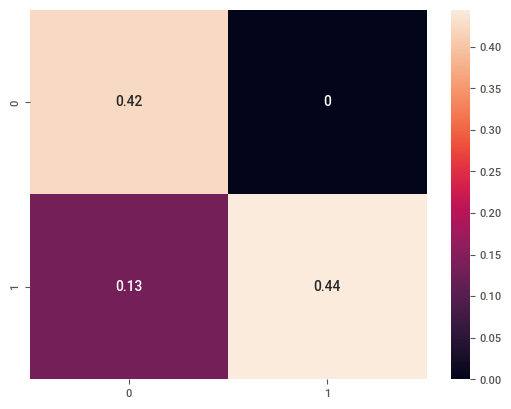

3.XGBoost
F1 Score:  0.7727272727272727


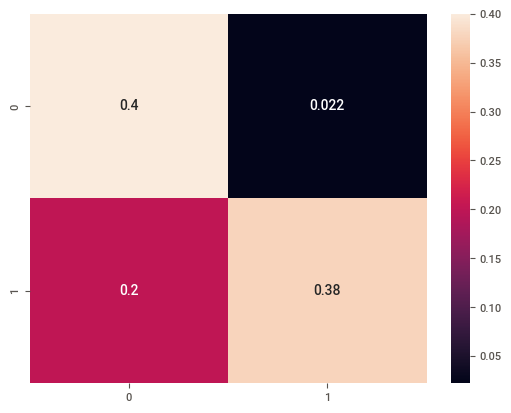

4.Support Vector Machine
F1 Score:  0.8936170212765957


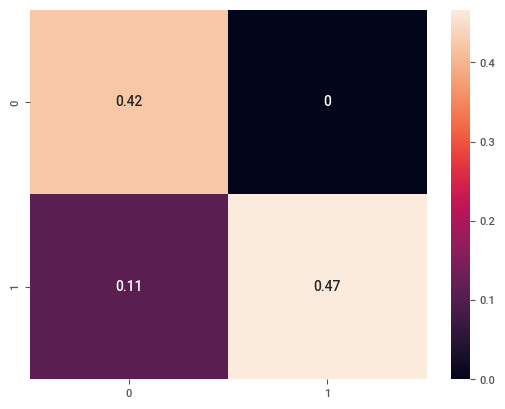

5.KNN
F1 Score:  0.8260869565217392


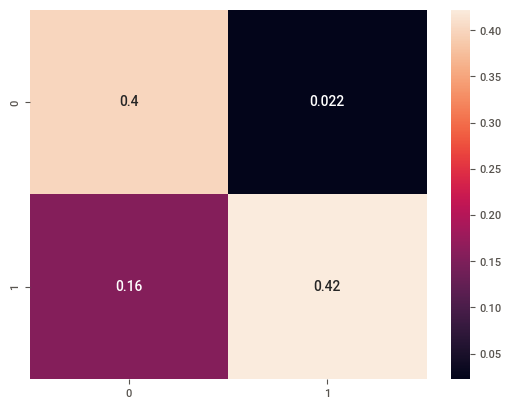

In [101]:

models= {
    '1.Random Forest': RandomForestClassifier(),
    '2.Logistic Regression': LogisticRegression(),
    '3.XGBoost' : XGBClassifier(),'4.Support Vector Machine': SVC(),'5.KNN': KNeighborsClassifier()
}

for name,model in models.items():
    model.fit(X_smote,y_smote)
    ypred = model.predict(X_test)
    print(name)
    print('F1 Score: ',f1_score(y_test,ypred))
    sns.heatmap(confusion_matrix(y_test,ypred)/np.sum(confusion_matrix(y_test,ypred)),annot=True)
    plt.show()

***We achive maximum accuracy in Support Vector Machine...***

In [102]:
pickle.dump(SVC,open('HeartDieseasePred.pkl','wb'))